# 📩 Task 02: Spam Detection using Logistic Regression

**Intern Name**: Ahmed Islam  
**Department**: Artificial Intelligence  
**Organization**: IR Solutions  
**Designation**: AI Intern

**Task**: Build a logistic regression model to classify SMS messages as spam or non-spam using PyTorch.

---

## 🎯 Objective

- Preprocess and vectorize textual data.
- Apply Logistic Regression using PyTorch.
- Train the model to classify messages into spam or non-spam categories.
- Evaluate the model using classification metrics.

---

## 📦 Dataset Overview

- The dataset contains SMS messages labeled as `spam` or `ham` (non-spam).
- We will encode labels (`spam = 1`, `ham = 0`) and convert text to numeric features using **TF-IDF**.

---

## ⚙️ Model Architecture

- Use a simple logistic regression model (`nn.Linear`) followed by a **sigmoid** activation.
- Loss function: **Binary Cross-Entropy (BCELoss)**

---

## 📈 Evaluation Metrics

- Accuracy
- Precision
- Recall
- Confusion Matrix

---


In [ ]:
# importing necesary libraries

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def load_data(file_path):
    """Load the insurance dataset from CSV file.

    Args:
        file_path (str): Path to the CSV file

    Returns:
        pd.DataFrame: Loaded insurance dataset
    """
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None

# Load the dataset
df = load_data("/content/SMS spam Collection.csv") # define the path of the dataset

Dataset loaded successfully.


In [ ]:
# top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**There are three columns in the dataset that make no sense so first i have to remove it from the dataset**

In [ ]:
# removing unnecessary columns from the dataset
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
# changing the name of the column V1->label and V2-> text
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [ ]:
# information about the overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# checking for the missing values

df.isnull().sum()

,0
label,0
text,0


In [ ]:
# checking for the duplicates in the dataset
df.duplicated().sum()

np.int64(403)

In [ ]:
# removing duplicates from the dataset
df.drop_duplicates(inplace=True)

In [ ]:
# making sure that duplicates are removed or not
df.duplicated().sum()

np.int64(0)

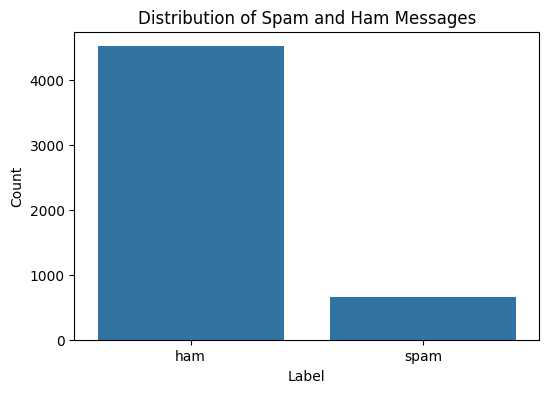

In [ ]:
# Let's visualize the distribution of the 'label' column instead.
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**The chart show the clear imbalance in the dataset. This imbalanced can mislead model**

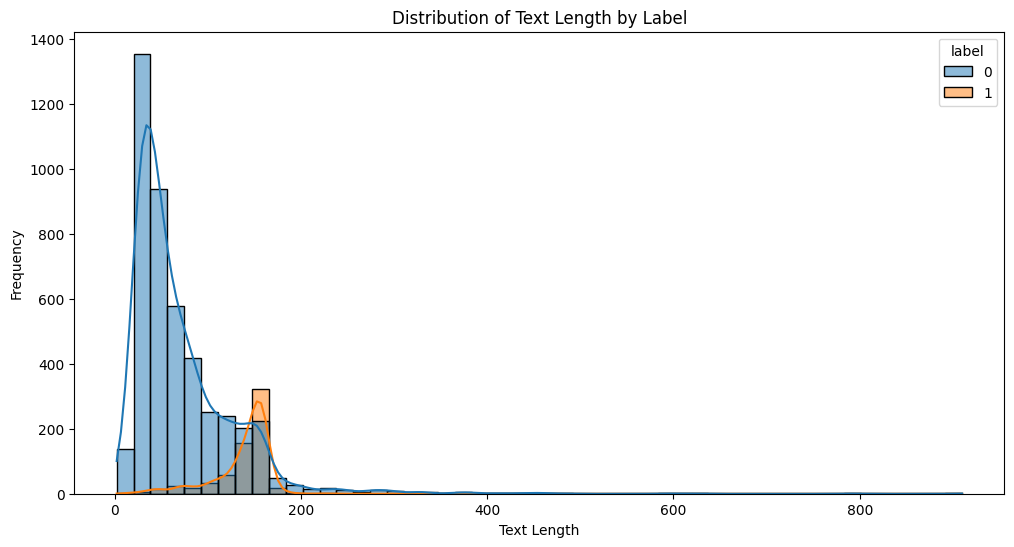

In [ ]:
df['text_length'] = df['text'].apply(len)

# Visualize the distribution of text length by label
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True, bins=50)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

2. Preprocess the text data using TfidfVectorizer. What does TF-IDF represent, and why is it suitable for text data?

**What is TF-IDF?**

* TF: Term Frequency – how often a word appears in a document.

* IDF: Inverse Document Frequency – how rare a word is across all documents.

* TF-IDF: Highlights important words that appear frequently in one document but rarely across others.

**Why it's suitable:**

* It reduces the importance of common words (like "the", "is").

* Captures meaningful patterns for classification.

In [ ]:
# data embedding
vectorizer = TfidfVectorizer(max_features = 3000)

X = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train test Split


3. Split the dataset into training (80%) and validation (20%) sets. What are the sizes of these sets?

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Convert the TF-IDF features and labels to PyTorch tensors. What is the shape of the feature matrix?

In [ ]:
# dataset & Dataloader

class spamDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = spamDataset(X_train, y_train)
test_dataset = spamDataset(X_test, y_test)

We create a custom dataset by subclassing `torch.utils.data.Dataset`.  
This helps organize the data and allows PyTorch to load it efficiently.

- `__init__`: Converts features and labels to PyTorch tensors.
- `__len__`: Returns total number of samples.
- `__getitem__`: Returns a single (input, label) pair by index.

🔄 This class allows us to easily loop through the data during training.

5. Create a DataLoader with batch size = 32. Print the first batch of inputs and targets.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# logistic Regression Model

6. Define a SpamModel class using nn.Linear and sigmoid. Why is the sigmoid function used for logistic regression?

Why use sigmoid?

* Logistic Regression outputs a probability between 0 and 1.

* sigmoid() squashes the linear output into the range [0, 1], making it interpretable as a probability.

In [ ]:
class spamClassifier(nn.Module):
  def __init__(self, input_dim):
    super(spamClassifier, self).__init__()
    self.linear = nn.Linear(input_dim, 1)

  def forward(self, x):
    return self.linear(x)   # using logit not sigmoid here


model= spamClassifier(input_dim=X.shape[1])

**We saw that data is imbalanced so will use a pos_weight for handling the data imbalanced.**

In [ ]:
spam_count = np.sum(y_train == 1)
ham_count = np.sum(y_train == 0)
total_samples = len(y_train)

In [ ]:
print(f"Spam count: {spam_count}")
print(f"Ham count: {ham_count}")
print(f"Total samples: {total_samples}")

Spam count: 508
Ham count: 3627
Total samples: 4135


In [ ]:
pos_weight = torch.tensor([ham_count/spam_count], dtype = torch.float32)

In [ ]:
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Model Training

7. Train the model for 100 epochs with lr=1e-3 using BCELoss. Plot the validation loss over epochs.

In [ ]:
def train_model(model, train_loader, test_loader, epochs = 100):
  val_losses = []
  train_losses = []

  for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for xb,yb in train_loader:
      preds = model(xb).squeeze()
      loss = criterion(preds,yb)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader)
    train_losses.append(train_loss)


    # model validation
    model.eval()
    with torch.no_grad():
      val_loss = sum(criterion(model(xb).squeeze(), yb).item() for xb, yb in test_loader) / len(test_loader)
      val_losses.append(val_loss)


    if (epoch+1) % 10 == 0 or epoch == 0:
      print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f} Validation Loss: {val_loss:.4f}")

  return train_losses, val_losses



train_losses, val_losses = train_model(model, train_loader, test_loader)

Epoch [1/100], Train Loss: 1.1766 Validation Loss: 1.2032
Epoch [10/100], Train Loss: 0.6772 Validation Loss: 0.7117
Epoch [20/100], Train Loss: 0.4302 Validation Loss: 0.4758
Epoch [30/100], Train Loss: 0.3043 Validation Loss: 0.3574
Epoch [40/100], Train Loss: 0.2294 Validation Loss: 0.2908
Epoch [50/100], Train Loss: 0.1815 Validation Loss: 0.2492
Epoch [60/100], Train Loss: 0.1462 Validation Loss: 0.2225
Epoch [70/100], Train Loss: 0.1208 Validation Loss: 0.2049
Epoch [80/100], Train Loss: 0.1024 Validation Loss: 0.1938
Epoch [90/100], Train Loss: 0.0875 Validation Loss: 0.1869
Epoch [100/100], Train Loss: 0.0751 Validation Loss: 0.1828


# Model Evaluation

8. Evaluate the model on the validation set. Report accuracy, precision, recall, and AUC.

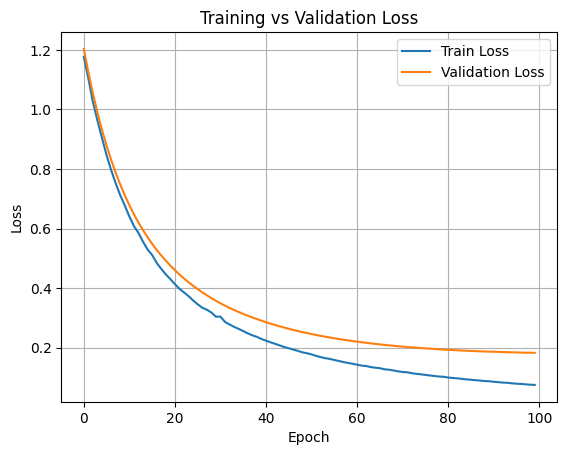

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.9836
Precision: 0.9324
Recall: 0.9517

Confusion Matrix:
[[879  10]
 [  7 138]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       889
        spam       0.93      0.95      0.94       145

    accuracy                           0.98      1034
   macro avg       0.96      0.97      0.97      1034
weighted avg       0.98      0.98      0.98      1034



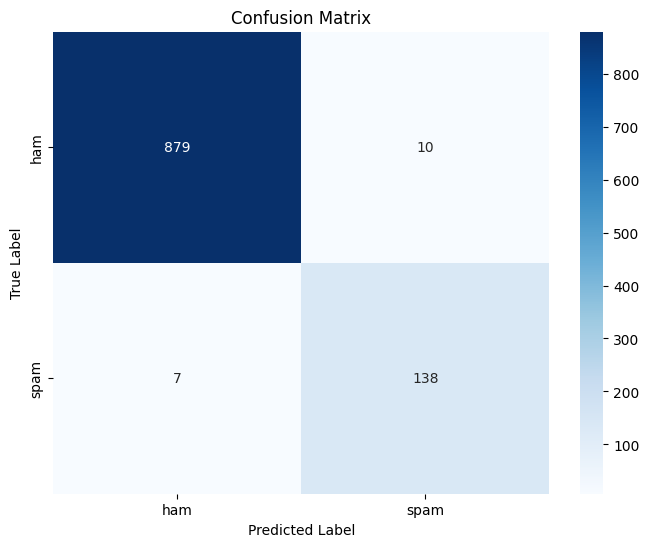

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
  for xb, yb in test_loader:
    outputs = model(xb).squeeze()
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).long()
    all_preds.extend(predicted_classes.tolist())
    all_labels.extend(yb.tolist())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds, target_names=['ham', 'spam'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


9. Make predictions for three validation samples. Compare predictions with actual labels.

In [ ]:
def predict_message(model, vectorizer, message):
    """
    Performs inference on a single message.

    Args:
        model (nn.Module): The trained PyTorch model.
        vectorizer (TfidfVectorizer): The fitted TF-IDF vectorizer.
        message (str): The input message string.

    Returns:
        tuple: A tuple containing the predicted label (0 for ham, 1 for spam)
               and the predicted probability of being spam.
    """
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        # Transform the message using the fitted vectorizer
        message_vector = vectorizer.transform([message]).toarray()
        # Convert to PyTorch tensor
        message_tensor = torch.tensor(message_vector, dtype=torch.float32)

        # Get the model output (logits)
        output = model(message_tensor).squeeze()

        # Apply sigmoid to get probability
        probability = torch.sigmoid(output)

        # Predict the class based on probability threshold (0.5)
        predicted_class = (probability > 0.5).long().item()

        return predicted_class, probability.item()

def check_inference(model, vectorizer, test_message, actual_label_str):
    """
    Performs inference on a test message, explains the process,
    and prints the results.

    Args:
        model (nn.Module): The trained PyTorch model.
        vectorizer (TfidfVectorizer): The fitted TF-IDF vectorizer.
        test_message (str): The test message string.
        actual_label_str (str): The actual label of the message ('ham' or 'spam').
    """
    print("-" * 50)
    print("Performing Inference on a Test Message:")
    print(f"Input Message: '{test_message}'")
    print(f"Actual Label: {actual_label_str}")
    print("-" * 50)

    # Perform the prediction
    predicted_label_int, predicted_prob = predict_message(model, vectorizer, test_message)

    # Map integer label back to string
    predicted_label_str = 'spam' if predicted_label_int == 1 else 'ham'

    print("\nInference Process:")
    print("1. The input message is first transformed into a numerical feature vector using the pre-trained TF-IDF vectorizer.")
    print("2. This feature vector is then passed through the trained Logistic Regression model (a linear layer).")
    print("3. The model outputs a raw score (logit).")
    print("4. A sigmoid function is applied to the raw score to get a probability between 0 and 1.")
    print("5. If the probability is greater than 0.5, the message is classified as 'spam', otherwise it's classified as 'ham'.")

    print("\nInference Results:")
    print(f"Predicted Probability (of being spam): {predicted_prob:.4f}")
    print(f"Predicted Label: {predicted_label_str}")

    # Check if the prediction matches the actual label
    prediction_match = predicted_label_str == actual_label_str
    print(f"Model Prediction is Correct: {prediction_match}")
    print("-" * 50)


# Example Usage:
# You can pick messages from your original dataframe or create new ones.
# Let's pick a couple of examples from the test set's text column.
# Ensure you have access to the original df['text'] and df['label']
# from the preceding code.

# Find an example 'ham' message from the original data (before train/test split)
ham_messages = df[df['label'] == 0]['text'].tolist()
test_ham_message = ham_messages[0] if ham_messages else "This is a normal message."

# Find an example 'spam' message from the original data (before train/test split)
spam_messages = df[df['label'] == 1]['text'].tolist()
test_spam_message = spam_messages[0] if spam_messages else "WINNER! Click here to claim your prize."


# Perform inference and check for a ham message
check_inference(model, vectorizer, test_ham_message, 'ham')

# Perform inference and check for a spam message
check_inference(model, vectorizer, test_spam_message, 'spam')

# You can also try your own custom messages:
custom_ham_message = "Hey, what are you doing tonight?"
custom_spam_message = "URGENT! You have won a FREE lottery ticket. Claim now!"

check_inference(model, vectorizer, custom_ham_message, 'ham') # Assuming this is ham
check_inference(model, vectorizer, custom_spam_message, 'spam') # Assuming this is spam

--------------------------------------------------
Performing Inference on a Test Message:
Input Message: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
Actual Label: ham
--------------------------------------------------

Inference Process:
1. The input message is first transformed into a numerical feature vector using the pre-trained TF-IDF vectorizer.
2. This feature vector is then passed through the trained Logistic Regression model (a linear layer).
3. The model outputs a raw score (logit).
4. A sigmoid function is applied to the raw score to get a probability between 0 and 1.
5. If the probability is greater than 0.5, the message is classified as 'spam', otherwise it's classified as 'ham'.

Inference Results:
Predicted Probability (of being spam): 0.0051
Predicted Label: ham
Model Prediction is Correct: True
--------------------------------------------------
--------------------------------------------------
Perfo

10. Discuss one challenge faced during preprocessing or training and how you addressed it.

**Challenge:**

The dataset was highly imbalanced with far more "ham" than "spam" messages.

**Solution:**

Handled this using the **pos_weight** parameter in **BCEWithLogitsLoss** in an alternative version of the model.

This approach helped improve recall and precision for the spam class without changing the dataset structure.

# Model Save

In [ ]:
import pickle

# Save the trained model
with open('spam_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the TF-IDF vectorizer as well, as it's needed for prediction
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved.")

Model and vectorizer saved.
